# Basic Statistics on TMS Postings

This notebook uses a csv file containing the composite of recordings from the TMS. Recordings began on 2/21/17 and were last done on 3/11/17. A few postings were removed from the TMS before 2/21/17, but the vast majority of positions available to 2017 PMF finalists were recorded. The contents of each individual posting are not within this csv file, only some data universal to each posting (hiring agency, starting date, number of positions, location, etc.). 

In [1]:
import pandas as pd #to write/read/work with csv files.
import numpy as np #to do math
import matplotlib.pyplot as plt #To make plots
import seaborn as sns #To make plots in a different way
%matplotlib inline

Opening csv file into a pandas dataframe, labeled df2 for historical reasons

In [2]:
df2=pd.read_csv('meta_composite.csv',encoding='ISO-8859-1')

In [3]:
df2.head(2)

,Listings,Position Title,Agency/Sub-Agency,Opening Date,Closing Date,Number of Positions,State,Series,GS-09,GS-11,GS-12,GS-13,Promotion Potential
0,3,Research Analyst,Broadcasting Board of Governors,2017-01-13,2017-12-13,1,DC,343,False,True,False,False,GS-13
1,9,Management and Program Analyst,Department of the Treasury / Bureau of the Fis...,2017-01-18,2017-03-01,1,DC,343,False,False,False,False,GS-12


In [4]:
df2.tail(2)

,Listings,Position Title,Agency/Sub-Agency,Opening Date,Closing Date,Number of Positions,State,Series,GS-09,GS-11,GS-12,GS-13,Promotion Potential
275,317,Budget Analyst,U.S. Agency for International Development,2017-03-10,2017-03-17,1,DC,560,True,True,False,False,GS-13
276,318,Health System Specialist,Department of Veterans Affairs / Veterans Heal...,2017-03-10,2017-03-24,1,CA,671,True,True,False,False,GS-12


The first question would be how many positions have been offered to PMFs over the recorded time period:

In [5]:
df2['Number of Positions'].sum()

628

Many postings have multiple positions (e.g. posting 0308 is for 36 "Acquisition Program Management Specialists"). The second question may be how many postings have been offered to PMFs over the recorded time period:

In [6]:
len(df2.Listings.value_counts().index)
#some postings are broken onto multiple rows of the dataframe.
#This was done for postings in multiple locations, to give each location it's own row.
#As a consequence, a bit of care to only count unique postings is needed.

238

On average, each posting has several positions. However the distribution isn't even. A relatively small subset of the postings account for the majority of the positions, as can be seen here:

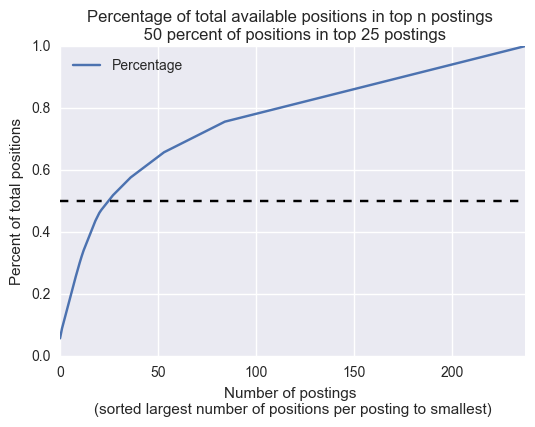

In [7]:
a=list(df2.loc[:,'Listings'].value_counts().index.values)
a.sort()
df_temp=pd.DataFrame();
df_temp['Listings']=a
x=0
for elm in a:
    df_temp.loc[x,'Number of Openings']=df2.loc[df2.loc[:,'Listings']==elm,'Number of Positions'].sum()
    x=x+1
b=df_temp.sort_values('Number of Openings', ascending=False)
b['Percentage']=0
b.reset_index(inplace=True)
del b['index']
for x in range(0,len(b)):
    b.loc[x,'Percentage']=b.loc[0:x,'Number of Openings'].sum()/(df2.loc[:,'Number of Positions'].sum())
b.plot(y='Percentage');
plt.ylabel('Percent of total positions');
plt.xlabel('Number of postings \n(sorted largest number of positions per posting to smallest)');
plt.title('Percentage of total available positions in top n postings \n 50 percent of positions in top %s postings'%(b.loc[b.loc[:,'Percentage']>.5,:].index[0]));
plt.axhline(.5,color='black',linestyle='--');

Some count plots of the different columns of data in the dataframe can also be useful.

val==column name

min_count==way to limit how many different values shown in plot

In [8]:
df2.head(1)

,Listings,Position Title,Agency/Sub-Agency,Opening Date,Closing Date,Number of Positions,State,Series,GS-09,GS-11,GS-12,GS-13,Promotion Potential
0,3,Research Analyst,Broadcasting Board of Governors,2017-01-13,2017-12-13,1,DC,343,False,True,False,False,GS-13


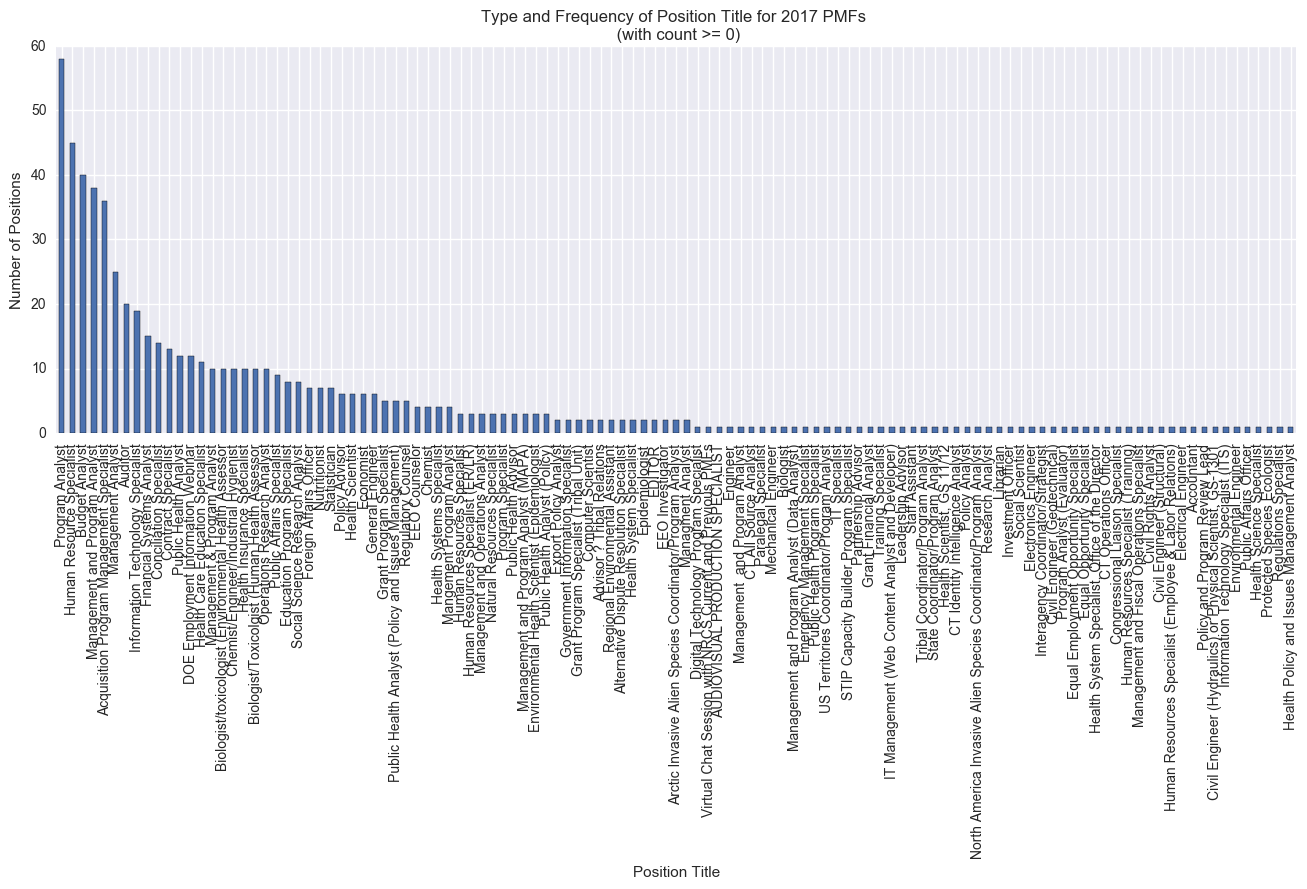

In [9]:
val='Position Title'
min_count=0;
df_titleTypes=pd.DataFrame()
df_titleTypes[val]=df2.loc[:,val].value_counts().index.values
df_titleTypes['Count']=0
for x in range(0,len(df2)):
    df_titleTypes.loc[df_titleTypes.loc[:,val]==df2.loc[x,[val]].values[0],'Count']=(
    df_titleTypes.loc[df_titleTypes.loc[:,val]==df2.loc[x,[val]].values[0],'Count']+df2.loc[x,['Number of Positions']].values[0])
df_titleTypes.sort_values(by='Count',ascending=False,inplace=True)
df_titleTypes=df_titleTypes.loc[df_titleTypes.loc[:,'Count']>=min_count,:]
df_titleTypes.plot(x=val, y='Count', kind='bar',legend=False,figsize=[16,5])
plt.xticks(rotation=90);
plt.ylabel('Number of Positions')
plt.title('Type and Frequency of %s for 2017 PMFs \n (with count >= %s)'%(val, min_count));

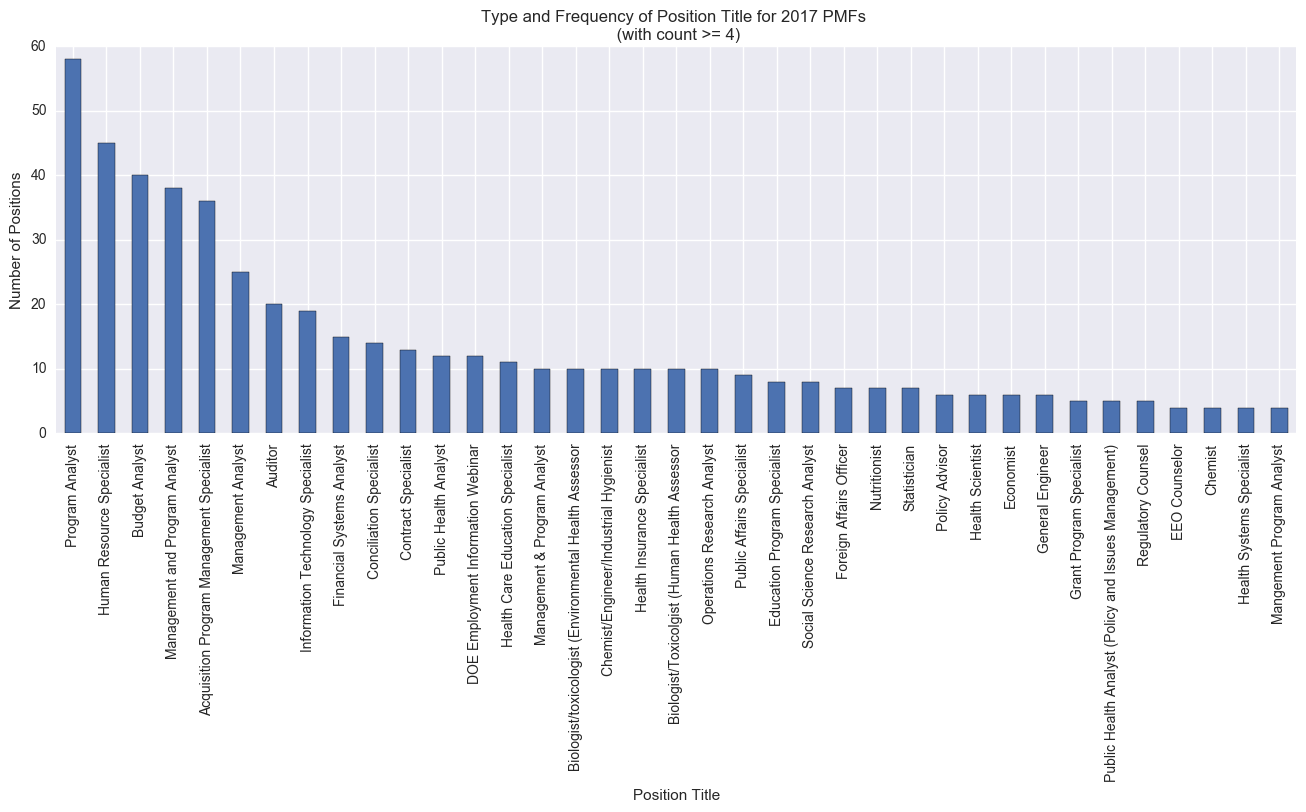

In [10]:
val='Position Title'
min_count=4;
df_titleTypes=pd.DataFrame()
df_titleTypes[val]=df2.loc[:,val].value_counts().index.values
df_titleTypes['Count']=0
for x in range(0,len(df2)):
    df_titleTypes.loc[df_titleTypes.loc[:,val]==df2.loc[x,[val]].values[0],'Count']=(
    df_titleTypes.loc[df_titleTypes.loc[:,val]==df2.loc[x,[val]].values[0],'Count']+df2.loc[x,['Number of Positions']].values[0])
df_titleTypes.sort_values(by='Count',ascending=False,inplace=True)
df_titleTypes=df_titleTypes.loc[df_titleTypes.loc[:,'Count']>=min_count,:]
df_titleTypes.plot(x=val, y='Count', kind='bar',legend=False,figsize=[16,5])
plt.xticks(rotation=90);
plt.ylabel('Number of Positions')
plt.title('Type and Frequency of %s for 2017 PMFs \n (with count >= %s)'%(val, min_count));

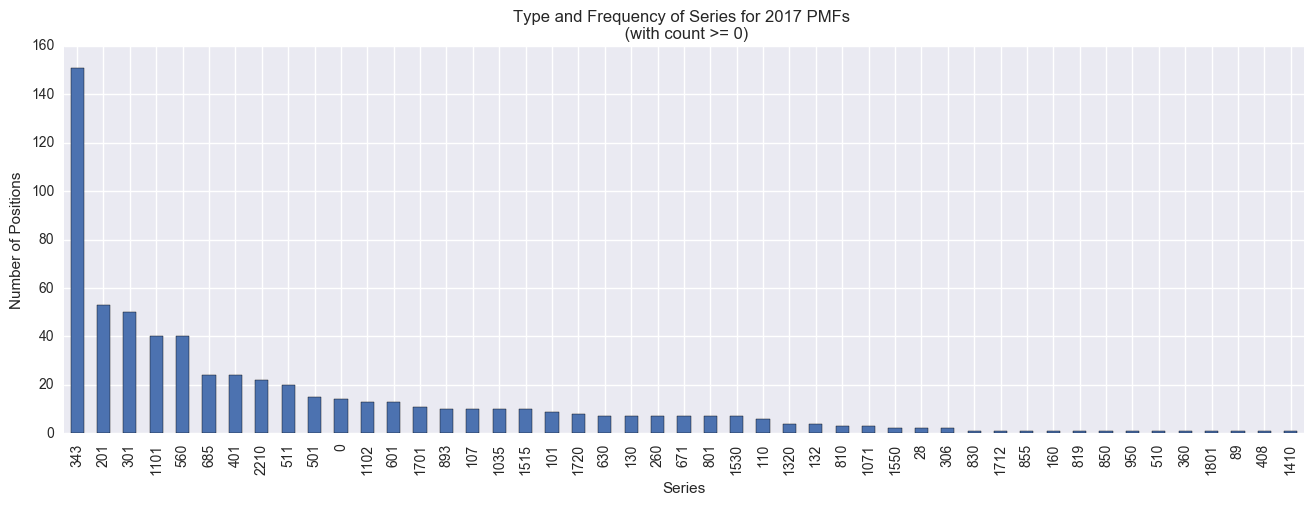

In [11]:
val='Series'
min_count=0;
df_titleTypes=pd.DataFrame()
df_titleTypes[val]=df2.loc[:,val].value_counts().index.values
df_titleTypes['Count']=0
for x in range(0,len(df2)):
    df_titleTypes.loc[df_titleTypes.loc[:,val]==df2.loc[x,[val]].values[0],'Count']=(
    df_titleTypes.loc[df_titleTypes.loc[:,val]==df2.loc[x,[val]].values[0],'Count']+df2.loc[x,['Number of Positions']].values[0])
df_titleTypes.sort_values(by='Count',ascending=False,inplace=True)
df_titleTypes=df_titleTypes.loc[df_titleTypes.loc[:,'Count']>=min_count,:]
df_titleTypes.plot(x=val, y='Count', kind='bar',legend=False,figsize=[16,5])
plt.xticks(rotation=90);
plt.ylabel('Number of Positions')
plt.title('Type and Frequency of %s for 2017 PMFs \n (with count >= %s)'%(val, min_count));

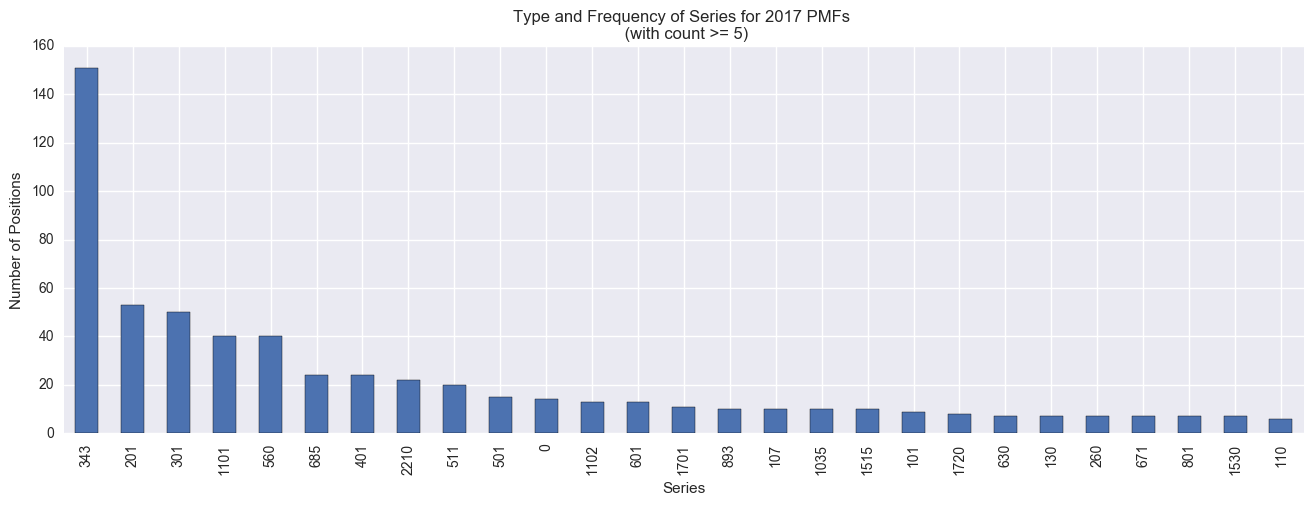

In [12]:
val='Series'
min_count=5;
df_titleTypes=pd.DataFrame()
df_titleTypes[val]=df2.loc[:,val].value_counts().index.values
df_titleTypes['Count']=0
for x in range(0,len(df2)):
    df_titleTypes.loc[df_titleTypes.loc[:,val]==df2.loc[x,[val]].values[0],'Count']=(
    df_titleTypes.loc[df_titleTypes.loc[:,val]==df2.loc[x,[val]].values[0],'Count']+df2.loc[x,['Number of Positions']].values[0])
df_titleTypes.sort_values(by='Count',ascending=False,inplace=True)
df_titleTypes=df_titleTypes.loc[df_titleTypes.loc[:,'Count']>=min_count,:]
df_titleTypes.plot(x=val, y='Count', kind='bar',legend=False,figsize=[16,5])
plt.xticks(rotation=90);
plt.ylabel('Number of Positions')
plt.title('Type and Frequency of %s for 2017 PMFs \n (with count >= %s)'%(val, min_count));

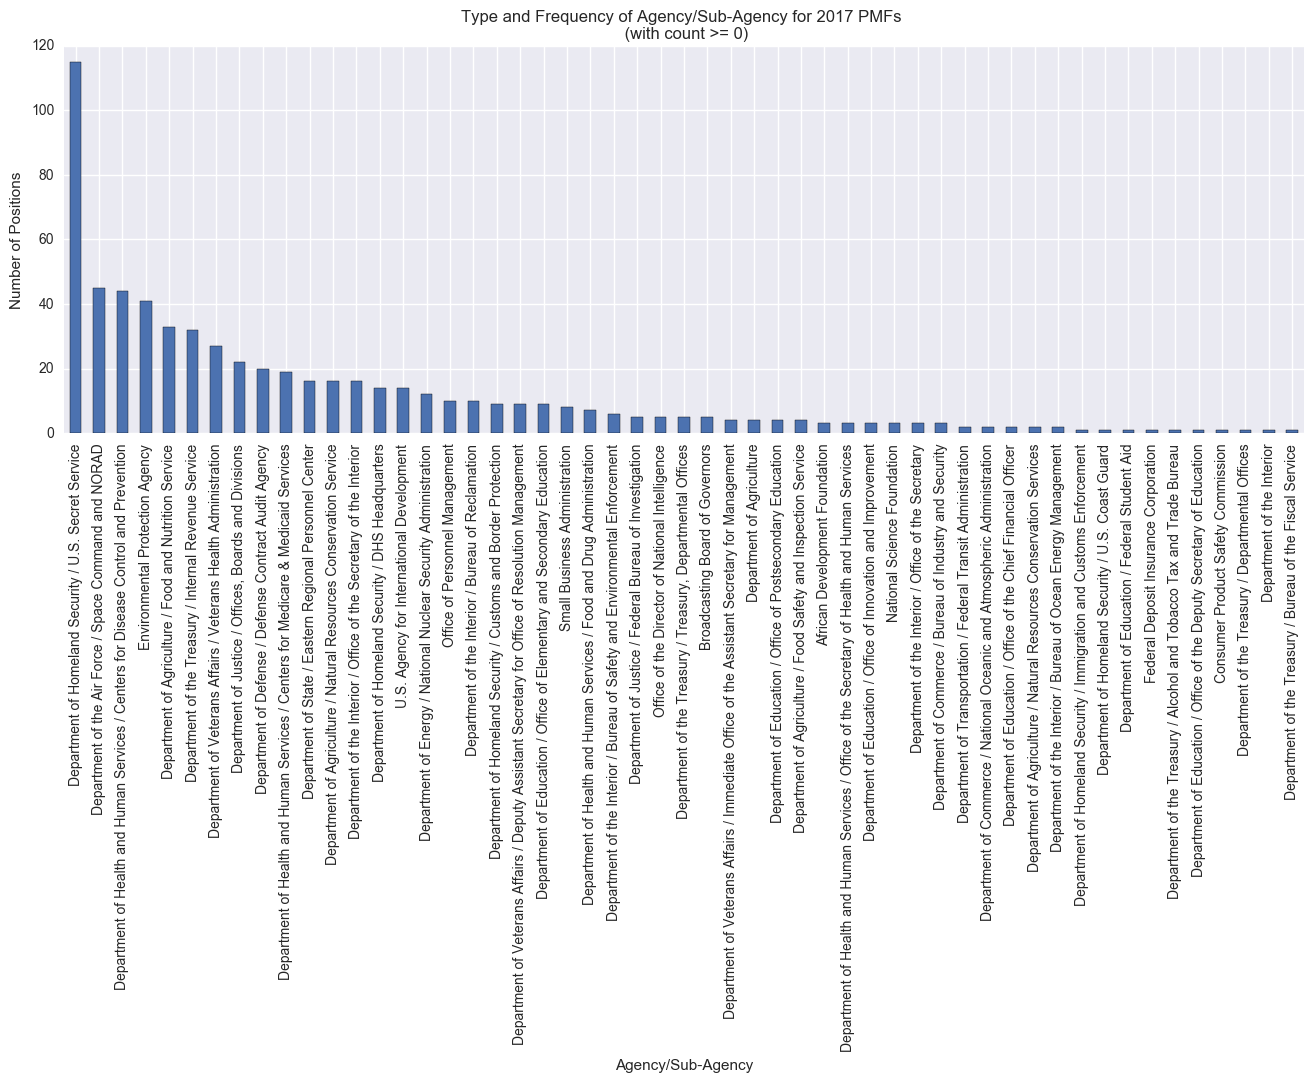

In [13]:
val='Agency/Sub-Agency'
min_count=0;
df_titleTypes=pd.DataFrame()
df_titleTypes[val]=df2.loc[:,val].value_counts().index.values
df_titleTypes['Count']=0
for x in range(0,len(df2)):
    df_titleTypes.loc[df_titleTypes.loc[:,val]==df2.loc[x,[val]].values[0],'Count']=(
    df_titleTypes.loc[df_titleTypes.loc[:,val]==df2.loc[x,[val]].values[0],'Count']+df2.loc[x,['Number of Positions']].values[0])
df_titleTypes.sort_values(by='Count',ascending=False,inplace=True)
df_titleTypes=df_titleTypes.loc[df_titleTypes.loc[:,'Count']>=min_count,:]
df_titleTypes.plot(x=val, y='Count', kind='bar',legend=False,figsize=[16,5])
plt.xticks(rotation=90);
plt.ylabel('Number of Positions')
plt.title('Type and Frequency of %s for 2017 PMFs \n (with count >= %s)'%(val, min_count));

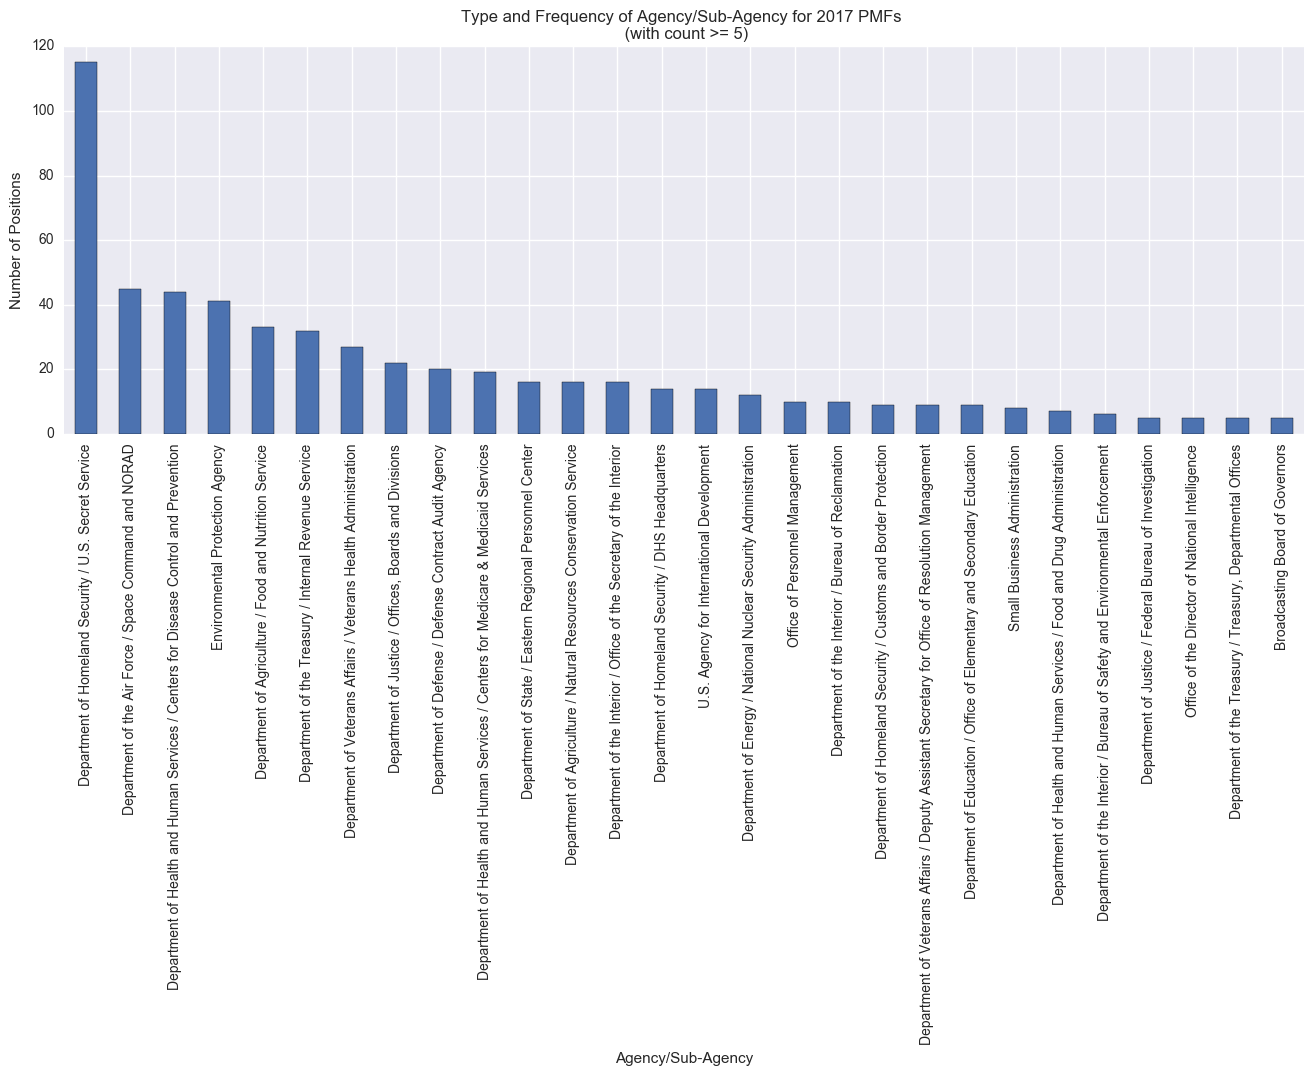

In [14]:
val='Agency/Sub-Agency'
min_count=5;
df_titleTypes=pd.DataFrame()
df_titleTypes[val]=df2.loc[:,val].value_counts().index.values
df_titleTypes['Count']=0
for x in range(0,len(df2)):
    df_titleTypes.loc[df_titleTypes.loc[:,val]==df2.loc[x,[val]].values[0],'Count']=(
    df_titleTypes.loc[df_titleTypes.loc[:,val]==df2.loc[x,[val]].values[0],'Count']+df2.loc[x,['Number of Positions']].values[0])
df_titleTypes.sort_values(by='Count',ascending=False,inplace=True)
df_titleTypes=df_titleTypes.loc[df_titleTypes.loc[:,'Count']>=min_count,:]
df_titleTypes.plot(x=val, y='Count', kind='bar',legend=False,figsize=[16,5])
plt.xticks(rotation=90);
plt.ylabel('Number of Positions')
plt.title('Type and Frequency of %s for 2017 PMFs \n (with count >= %s)'%(val, min_count));

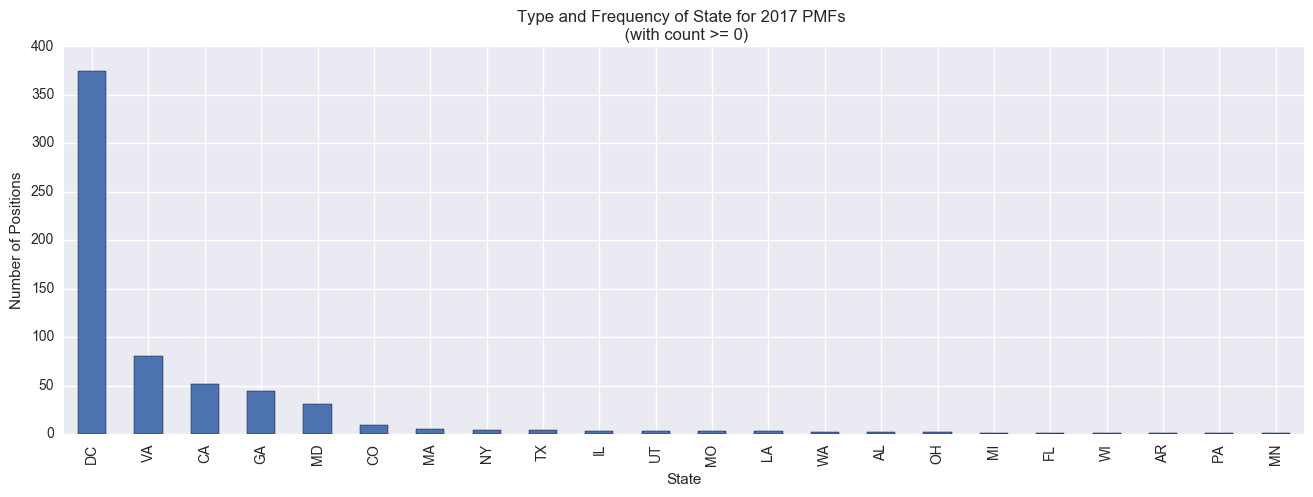

In [15]:
val='State'
min_count=0;
df_titleTypes=pd.DataFrame()
df_titleTypes[val]=df2.loc[:,val].value_counts().index.values
df_titleTypes['Count']=0
for x in range(0,len(df2)):
    df_titleTypes.loc[df_titleTypes.loc[:,val]==df2.loc[x,[val]].values[0],'Count']=(
    df_titleTypes.loc[df_titleTypes.loc[:,val]==df2.loc[x,[val]].values[0],'Count']+df2.loc[x,['Number of Positions']].values[0])
df_titleTypes.sort_values(by='Count',ascending=False,inplace=True)
df_titleTypes=df_titleTypes.loc[df_titleTypes.loc[:,'Count']>=min_count,:]
df_titleTypes.plot(x=val, y='Count', kind='bar',legend=False,figsize=[16,5])
plt.xticks(rotation=90);
plt.ylabel('Number of Positions')
plt.title('Type and Frequency of %s for 2017 PMFs \n (with count >= %s)'%(val, min_count));

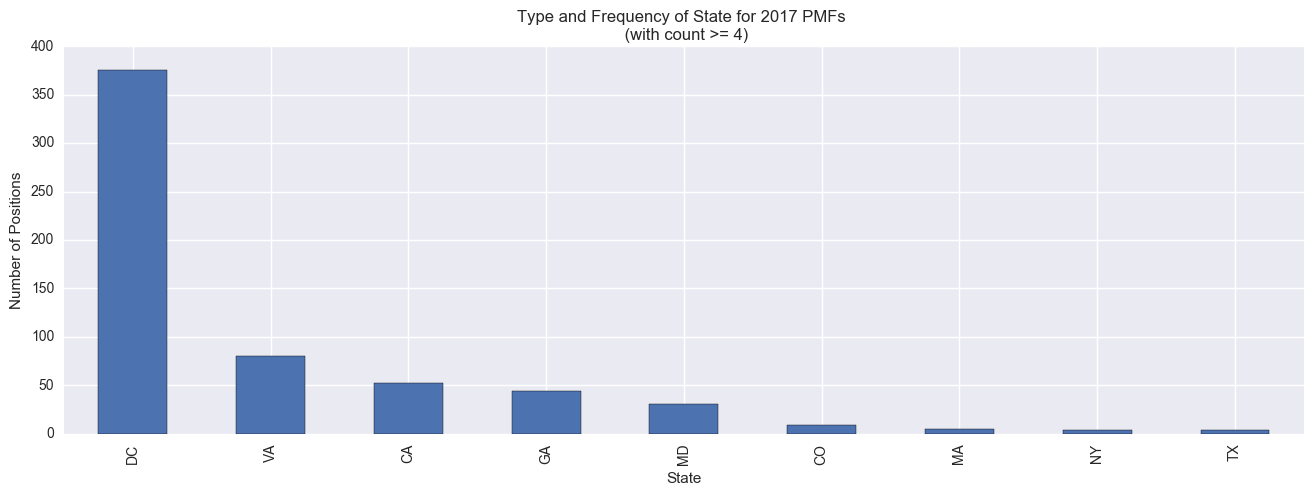

In [16]:
val='State'
min_count=4;
df_titleTypes=pd.DataFrame()
df_titleTypes[val]=df2.loc[:,val].value_counts().index.values
df_titleTypes['Count']=0
for x in range(0,len(df2)):
    df_titleTypes.loc[df_titleTypes.loc[:,val]==df2.loc[x,[val]].values[0],'Count']=(
    df_titleTypes.loc[df_titleTypes.loc[:,val]==df2.loc[x,[val]].values[0],'Count']+df2.loc[x,['Number of Positions']].values[0])
df_titleTypes.sort_values(by='Count',ascending=False,inplace=True)
df_titleTypes=df_titleTypes.loc[df_titleTypes.loc[:,'Count']>=min_count,:]
df_titleTypes.plot(x=val, y='Count', kind='bar',legend=False,figsize=[16,5])
plt.xticks(rotation=90);
plt.ylabel('Number of Positions')
plt.title('Type and Frequency of %s for 2017 PMFs \n (with count >= %s)'%(val, min_count));

A differnt bit of code looks at the opening and closing dates every day to determine how many positions are available on any given day.

Also looks for which agency and which job title is most common on any day.

In [17]:
df2['Opening Date']=pd.to_datetime(df2['Opening Date'])
df2['Closing Date']=pd.to_datetime(df2['Closing Date'])
df2['Opening Date 2']=df2.loc[:,'Opening Date']-pd.Timestamp('20170101')
df2['Closing Date 2']=df2.loc[:,'Closing Date']-pd.Timestamp('20170101')

In [18]:
#number available
df_time=pd.DataFrame()
df_time['Days']=range(0,71)
df_time['Positions']=0
df_time['Top Agency']=''
df_time['Top Title']=''

In [19]:
for x in range(0,len(df_time)):
    df_time.loc[x,'Positions']=df2.loc[(df2.loc[:,'Opening Date 2'].dt.days<=x)&(
        df2.loc[:,'Closing Date 2'].dt.days>=x),'Number of Positions'].sum()
    try:
        df_time.loc[x,'Top Agency']=df2.loc[(df2.loc[:,'Opening Date 2'].dt.days<=x)&(
            df2.loc[:,'Closing Date 2'].dt.days>=x),'Agency/Sub-Agency'].value_counts().index[0]
    except:
        pass
    try:
        df_time.loc[x,'Top Title']=df2.loc[(df2.loc[:,'Opening Date 2'].dt.days<=x)&(
            df2.loc[:,'Closing Date 2'].dt.days>=x),'Position Title'].value_counts().index[0]
    except:
        pass

In [20]:
from datetime import timedelta
for x in range(0,len(df_time)):
    df_time.loc[x,'Date']=pd.Timestamp('20170101')+timedelta(days=x)

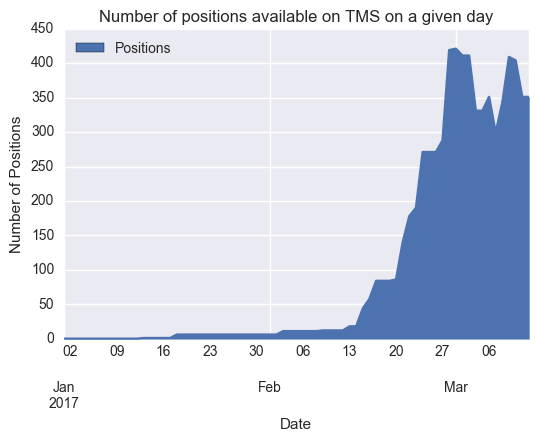

In [21]:
df_time.plot.area(x='Date',y='Positions');
plt.ylabel('Number of Positions');
plt.xlabel('Date');
plt.title('Number of positions available on TMS on a given day');

Can do the same thing for the number of postings on the TMS each day, by removing duplicate rows for the same job number (note: this can accurately count number of postings on TMS but loses information on number of positions and locations available). Making a special dataframe so I don't lose information from df2.

In [22]:
df3=df2.copy()
df3=df3.drop_duplicates(subset='Listings')
df3.reset_index(inplace=True)
del df3['index']

In [23]:
df_time2=pd.DataFrame()
df_time2['Days']=range(0,71)
df_time2['Postings']=0
for x in range(0,len(df_time2)):
    df_time2.loc[x,'Postings']=len(df3.loc[(df3.loc[:,'Opening Date 2'].dt.days<=x)&(
        df3.loc[:,'Closing Date 2'].dt.days>=x),:])
from datetime import timedelta
for x in range(0,len(df_time2)):
    df_time2.loc[x,'Date']=pd.Timestamp('20170101')+timedelta(days=x)

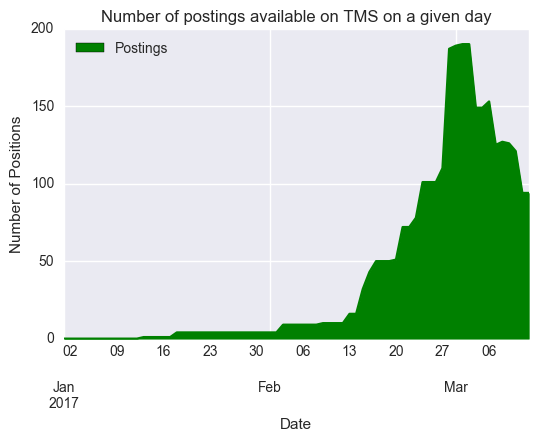

In [24]:
df_time2.plot.area(x='Date',y='Postings',color='green');
plt.ylabel('Number of Positions');
plt.xlabel('Date');
plt.title('Number of postings available on TMS on a given day');

And combine the two graphs from above to get a better feel for how opportunities vary with time.

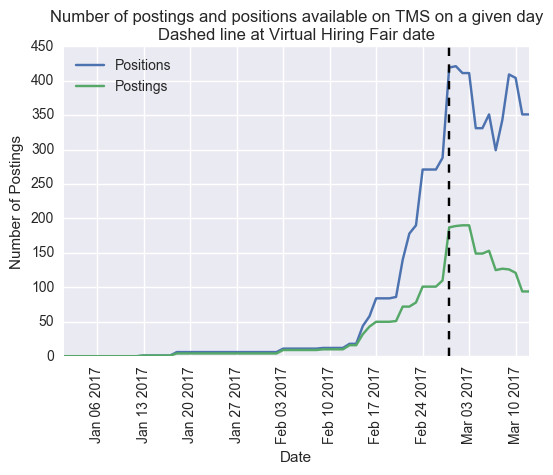

In [25]:
plt.plot(df_time['Date'],df_time['Positions'],label='Positions')
plt.plot(df_time2['Date'],df_time2['Postings'],label='Postings')
plt.ylabel('Number of Postings');
plt.xlabel('Date');
plt.legend(loc=2);
plt.title('Number of postings and positions available on TMS on a given day\nDashed line at Virtual Hiring Fair date');
plt.axvline(pd.Timestamp('20170228'),color='black',linestyle='--')
plt.xticks(rotation=90);

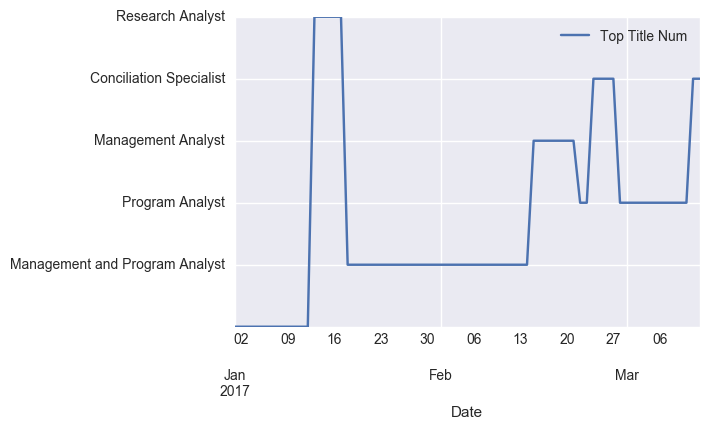

In [26]:
col='Top Title'
TA=list(df_time.loc[df_time[col].str.len()>0,col].value_counts().index)
TAdic={};
for x in range(1,len(TA)+1):
    TAdic[TA[x-1]]=x
df_time['%s Num'%col]=0
df_time['%s Num'%col]=df_time[col].map(TAdic)
df_time['%s Num'%col].fillna(0,inplace=True)
df_time.plot('Date','%s Num'%col)
LABELS=['']+TA;
plt.yticks(range(0,len(TA)+1), LABELS);

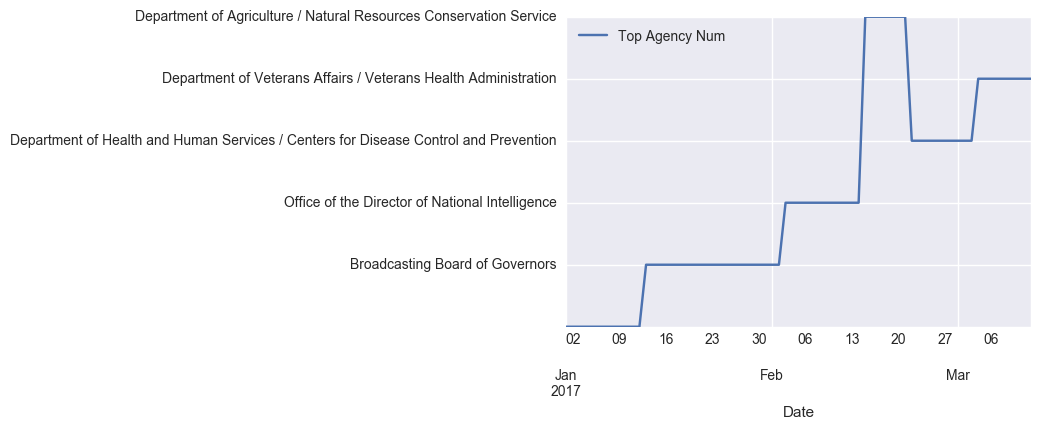

In [27]:
col='Top Agency'
TA=list(df_time.loc[df_time[col].str.len()>0,col].value_counts().index)
TAdic={};
for x in range(1,len(TA)+1):
    TAdic[TA[x-1]]=x
df_time['%s Num'%col]=0
df_time['%s Num'%col]=df_time[col].map(TAdic)
df_time['%s Num'%col].fillna(0,inplace=True)
df_time.plot('Date','%s Num'%col)
LABELS=['']+TA;
plt.yticks(range(0,len(TA)+1), LABELS);